In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
num_predictions = 20

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def get_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  return model

In [6]:
model = get_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [9]:
hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.7521 - accuracy: 0.7418 - val_loss: 0.7379 - val_accuracy: 0.7482
Epoch 2/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.7480 - accuracy: 0.7442 - val_loss: 0.7264 - val_accuracy: 0.7507
Epoch 3/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7391 - accuracy: 0.7487 - val_loss: 0.7572 - val_accuracy: 0.7374
Epoch 4/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.7336 - accuracy: 0.7488 - val_loss: 0.7079 - val_accuracy: 0.7626
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.7274 - accuracy: 0.7522 - val_loss: 0.7219 - val_accuracy: 0.7580
Epoch 6/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7235 - accuracy: 0.7533 - val_loss: 0.7353 - val_accuracy: 0.7528
Epoch 7/50
50000/50000 [==============================] - 9s 1

In [0]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']


In [0]:
import matplotlib.pyplot as plt

In [24]:
plt.plot()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

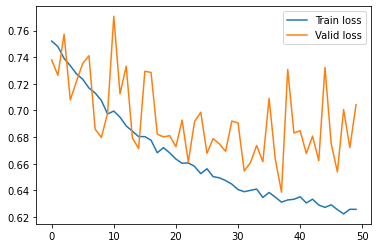

In [35]:
t_loss, = plt.plot(range(len(loss)),loss, label="Train loss")
v_loss, = plt.plot(range(len(val_loss)),val_loss, label="Valid loss")
plt.legend([t_loss,v_loss],["Train loss","Valid loss"])
plt.show()

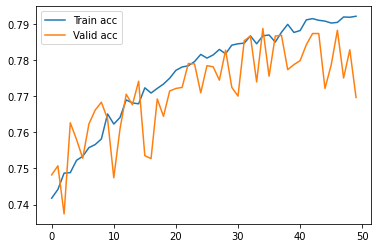

In [36]:
t_acc, = plt.plot(range(len(acc)),acc, label="Train acc")
v_acc, = plt.plot(range(len(val_acc)),val_acc, label="Valid acc")
plt.legend([t_acc,v_acc],["Train acc","Valid acc"])
plt.show()

In [37]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 87us/step
Test loss: 0.7042852272987365
Test accuracy: 0.769599974155426
